In [13]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the openweather api using key
from api_keys import weather_api_key

# Citipy dependency
from citipy import citipy

# Getting the data file (csv)
output_data = pd.read_csv(r"\Users\lealr\OneDrive\DU Bootcamp\Python APIs\API-challenge\output_data\cities.csv")
output_data

,Unnamed: 0,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
0,0,Rikitea,-23.1203,-134.9692,74.66,78,1689474475,15.08,45,PF
1,1,Saint George,37.1041,-113.5841,110.25,6,1689474192,3.44,0,US
2,2,Wiarton,44.7407,-81.1332,67.50,100,1689474476,4.61,40,CA
3,3,George Town,5.4112,100.3354,87.73,82,1689474314,2.30,20,MY
4,4,Busselton,-33.6500,115.3333,60.49,62,1689474476,16.33,20,AU
...,...,...,...,...,...,...,...,...,...,...
534,534,Urucará,-2.5364,-57.7600,77.68,71,1689474584,2.75,49,BR
535,535,Deception Bay,-27.2000,153.0333,76.08,44,1689474584,4.68,0,AU
536,536,Skole,49.0372,23.5135,60.71,78,1689474584,4.97,0,UA
537,537,Puerto Madero,14.7208,-92.4215,79.00,100,1689474585,0.00,40,MX


In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [50]:
output_data.columns

Index(['Unnamed: 0', 'City', 'Latitude', 'Longitude', 'Max Temp', 'Humidity',
       'Data', 'Wind Speed', 'Cloudiness', 'Country'],
      dtype='object')

In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
latitude_list = []
longitude_list = []
temp_max_list = []
humidity_list = []
wind_speed_list = []
date_list = []
country_list = []
city_list = []
cloudiness_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send the API request and get the response
        response = requests.get(city_url)
        
        # Check if the response status code is OK (200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']
            city_name = city_weather['name']

            # Append the City information into city_data list
            latitude_list.append(city_lat)
            longitude_list.append(city_lng)
            temp_max_list.append(city_max_temp)
            humidity_list.append(city_humidity)
            wind_speed_list.append(city_wind)
            date_list.append(city_date)
            country_list.append(city_country)
            cloudiness_list.append(city_clouds)
            city_list.append(city_name)
        else:
            print(f"City not found. Skipping {city}...")
    
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred while processing {city}: {e}. Skipping...")
    pass
print("--------------------------------------------------------------------")
print("Data Retrieval Complete")
print("--------------------------------------------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | vaini
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | izumo
Processing Record 3 of Set 1 | lamu
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | cabra
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | basco
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping nizhneyansk...
Processing Record 11 of Set 1 | husavik
Processing Record 12 of Set 1 | agadir
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | leh
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping barentsburg...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 o

City not found. Skipping bolungarvik...
Processing Record 26 of Set 4 | castro
Processing Record 27 of Set 4 | betsiamites
Processing Record 28 of Set 4 | ayagoz
Processing Record 29 of Set 4 | tsihombe
City not found. Skipping tsihombe...
Processing Record 30 of Set 4 | cabedelo
Processing Record 31 of Set 4 | nabire
Processing Record 32 of Set 4 | mahajanga
Processing Record 33 of Set 4 | visby
Processing Record 34 of Set 4 | gizo
Processing Record 35 of Set 4 | pak phanang
Processing Record 36 of Set 4 | carnarvon
Processing Record 37 of Set 4 | zirandaro
Processing Record 38 of Set 4 | port hardy
Processing Record 39 of Set 4 | junagarh
Processing Record 40 of Set 4 | rudnya
Processing Record 41 of Set 4 | ammon
Processing Record 42 of Set 4 | natori
Processing Record 43 of Set 4 | torit
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | te anau
Processing Record 46 of Set 4 | kindu
Processing Record 47 of Set 4 | rongcheng
Processing Record 48 of Set 4 | nann

Processing Record 11 of Set 8 | calabozo
Processing Record 12 of Set 8 | bull savanna
Processing Record 13 of Set 8 | kholtoson
Processing Record 14 of Set 8 | nanortalik
Processing Record 15 of Set 8 | verkh-usugli
Processing Record 16 of Set 8 | beyneu
Processing Record 17 of Set 8 | lilongwe
Processing Record 18 of Set 8 | traverse city
Processing Record 19 of Set 8 | los llanos de aridane
Processing Record 20 of Set 8 | praya
Processing Record 21 of Set 8 | dukat
Processing Record 22 of Set 8 | ust-nera
Processing Record 23 of Set 8 | shihezi
Processing Record 24 of Set 8 | upata
Processing Record 25 of Set 8 | careiro da varzea
Processing Record 26 of Set 8 | norman wells
Processing Record 27 of Set 8 | porosozero
Processing Record 28 of Set 8 | lovozero
Processing Record 29 of Set 8 | ostrovnoy
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | dolbeau
City not found. Skipping dolbeau...
Processing Record 32 of Set 8 | keflavik
Processing Record 33 of Set 8 |

Processing Record 41 of Set 11 | sakakah
Processing Record 42 of Set 11 | aflu
City not found. Skipping aflu...
Processing Record 43 of Set 11 | sayyan
Processing Record 44 of Set 11 | arman
Processing Record 45 of Set 11 | alofi
Processing Record 46 of Set 11 | white rock
Processing Record 47 of Set 11 | samalaeulu
City not found. Skipping samalaeulu...
Processing Record 48 of Set 11 | guilford
Processing Record 49 of Set 11 | naze
Processing Record 0 of Set 12 | bolu
Processing Record 1 of Set 12 | college
Processing Record 2 of Set 12 | marquette
Processing Record 3 of Set 12 | pemangkat
Processing Record 4 of Set 12 | schattdorf
Processing Record 5 of Set 12 | hualmay
Processing Record 6 of Set 12 | qui nhon
Processing Record 7 of Set 12 | surgut
Processing Record 8 of Set 12 | rockport
Processing Record 9 of Set 12 | khonuu
City not found. Skipping khonuu...
Processing Record 10 of Set 12 | pereira barreto
Processing Record 11 of Set 12 | ugoofaaru
Processing Record 12 of Set 12 |

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City" : city_list,
    "Latitude" : latitude_list,
    "Longitude" : longitude_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Data" : date_list,
    "Wind Speed" : wind_speed_list,
    "Cloudiness" : cloudiness_list,
    "Country" : country_list
})

# Show the Record count
city_data_df.count()

City          560
Latitude      560
Longitude     560
Max Temp      560
Humidity      560
Data          560
Wind Speed    560
Cloudiness    560
Country       560
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
0,Vaini,-21.2000,-175.2000,69.96,78,1689474479,10.36,100,TO
1,Hermanus,-34.4187,19.2345,60.80,82,1689474484,14.07,100,ZA
2,Izumo,35.3667,132.7667,93.15,55,1689474656,9.22,20,JP
3,Lamu,-2.2717,40.9020,77.22,85,1689474855,16.11,25,KE
4,Chapais,49.7834,-74.8492,71.38,84,1689474320,8.55,100,CA


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\lealr\OneDrive\DU Bootcamp\Python APIs\API-challenge\output_data\cities.csv", index=True)

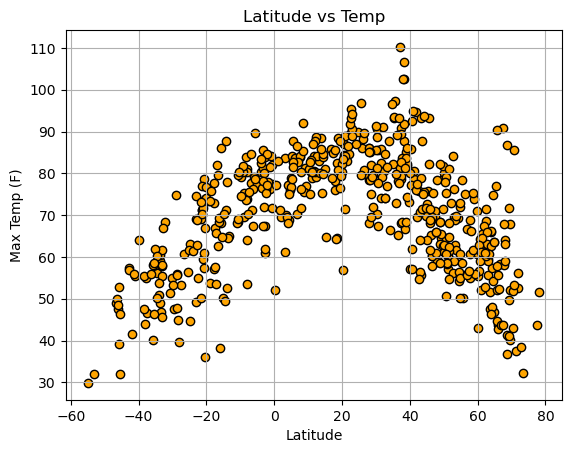

In [55]:
# Build scatter plot for latitude vs. temp
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], facecolor="orange", edgecolor="black")
plt.title("Latitude vs Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.grid()

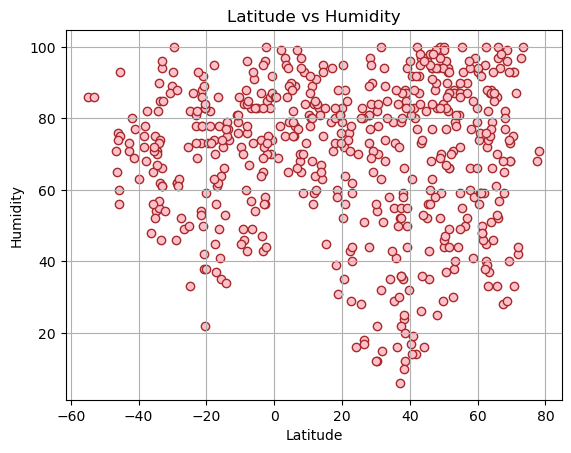

In [56]:
# Latitude vs Humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], facecolor='pink', edgecolor='brown')

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.grid()


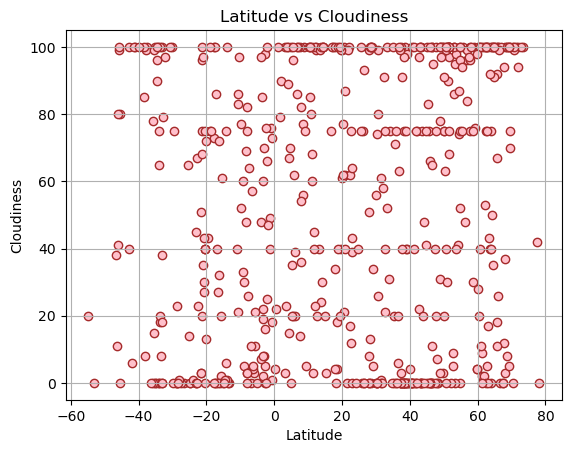

In [57]:
# Latitude vs cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], facecolor='pink', edgecolor='brown')

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.grid()

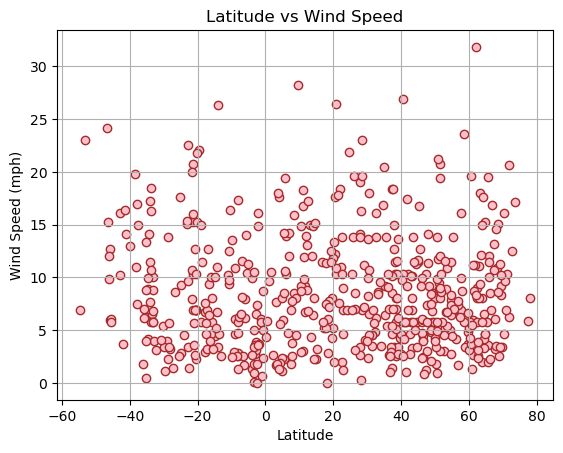

In [58]:
# Latitude vs wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], facecolor='pink', edgecolor='brown')

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()

In [59]:
# Creating dataframes for Northern and Southern Hemispheres
north_hemisphere = city_data_df[city_data_df['Latitude'] >= 0]

south_hemisphere = city_data_df[city_data_df['Latitude'] <= 0]

In [60]:
north_hemisphere.head()

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
2,Izumo,35.3667,132.7667,93.15,55,1689474656,9.22,20,JP
4,Chapais,49.7834,-74.8492,71.38,84,1689474320,8.55,100,CA
6,Cabra,37.4725,-4.4421,68.23,55,1689474856,1.43,0,ES
7,Albany,42.6001,-73.9662,75.88,87,1689474488,4.68,97,US
9,Basco,20.4487,121.9702,84.34,72,1689474759,12.26,100,PH


In [61]:
south_hemisphere.head()

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
0,Vaini,-21.2000,-175.2000,69.96,78,1689474479,10.36,100,TO
1,Hermanus,-34.4187,19.2345,60.80,82,1689474484,14.07,100,ZA
3,Lamu,-2.2717,40.9020,77.22,85,1689474855,16.11,25,KE
5,São João da Barra,-21.6403,-41.0511,69.06,73,1689474484,10.71,51,BR
8,Bluff,-46.6000,168.3333,49.10,71,1689474502,24.14,38,NZ


The r-value is:  -0.6142049966946745
Equation of the regression line: y = -0.43x + 89.30


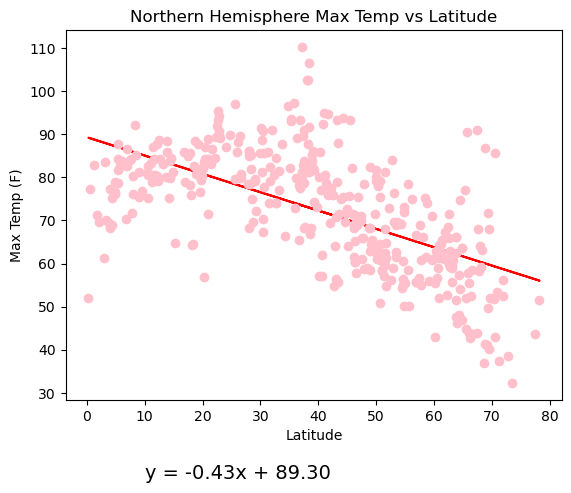

In [64]:
# Linear regression on Northern Hemisphere 

# Calculate the correlation coefficient

# Pearson Correlation coefficent with SCIPY
x = north_hemisphere['Latitude']
y = north_hemisphere['Max Temp']

# Obtain m(slope) and b (intercept) of the linear regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Adding the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(10, 10, equation_line, fontsize=14) 

plt.title('Northern Hemisphere Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')


r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  0.7541231708824396
Equation of the regression line: y = 0.74x + 79.91


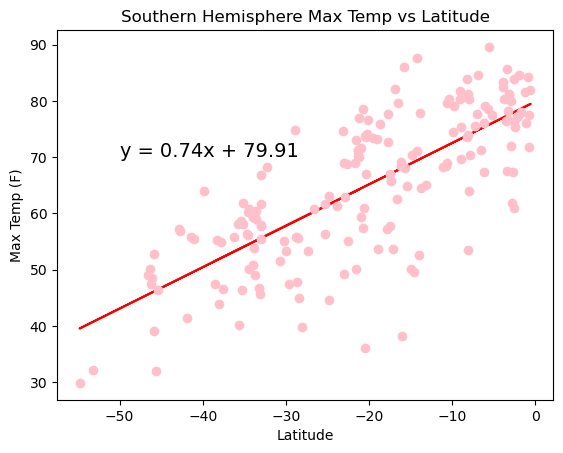

In [65]:
# Linear regression on Southern Hemisphere

x = south_hemisphere['Latitude']
y = south_hemisphere['Max Temp']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-50, 70, equation_line, fontsize=14)

plt.title('Southern Hemisphere Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  -0.04965822505228698
Equation of the regression line: y = -0.06x + 71.87


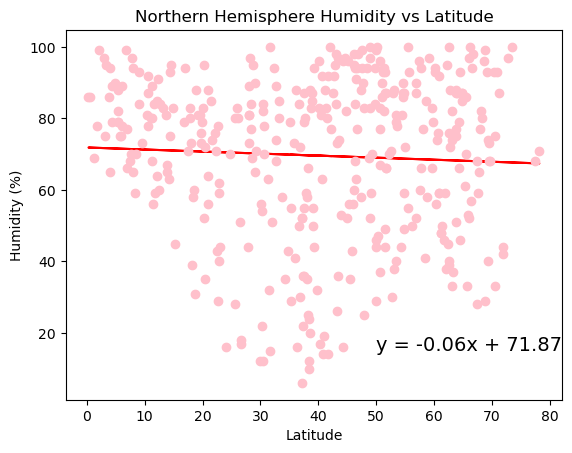

In [66]:
# Humidity Northern Hemisphere
x = north_hemisphere['Latitude']
y = north_hemisphere['Humidity']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(50, 15, equation_line, fontsize=14)

plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))



The r-value is:  0.013931762504882114
Equation of the regression line: y = 0.02x + 70.77


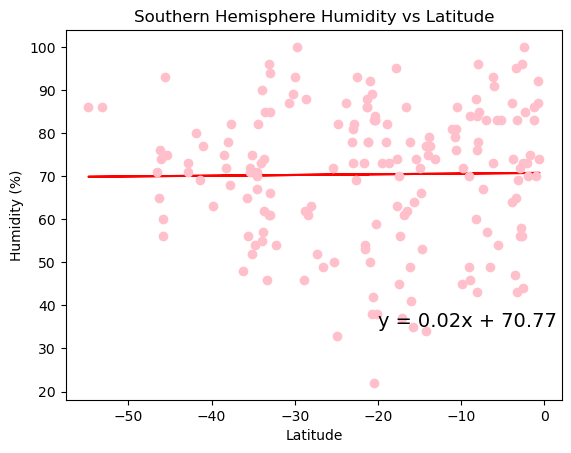

In [67]:
# Humidity Southern Hemisphere
x = south_hemisphere['Latitude']
y = south_hemisphere['Humidity']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-20, 35, equation_line, fontsize=14)

plt.title('Southern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  0.05867399306547425
Equation of the regression line: y = 0.12x + 50.10


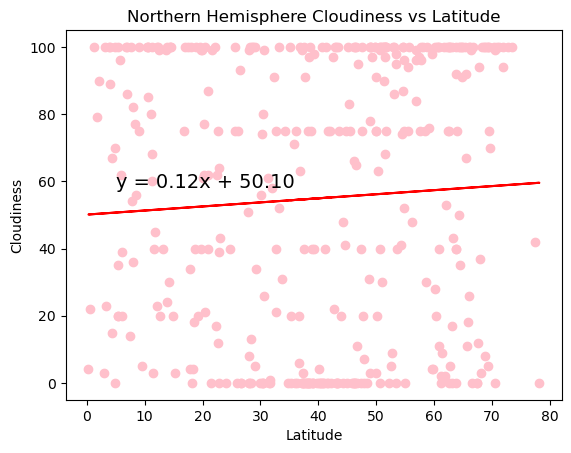

In [68]:
# Cloudiness Northern Hemisphere
x = north_hemisphere['Latitude']
y = north_hemisphere['Cloudiness']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(5, 58, equation_line, fontsize=14)

plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  -0.13944568021144438
Equation of the regression line: y = -0.39x + 33.44


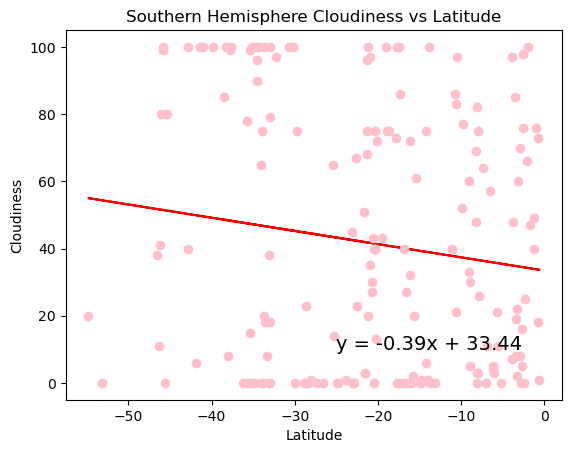

In [69]:
# Cloudiness Southern Hemisphere
x = south_hemisphere['Latitude']
y = south_hemisphere['Cloudiness']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-25, 10, equation_line, fontsize=14)

plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  -0.051110033588189885
Equation of the regression line: y = -0.01x + 8.96


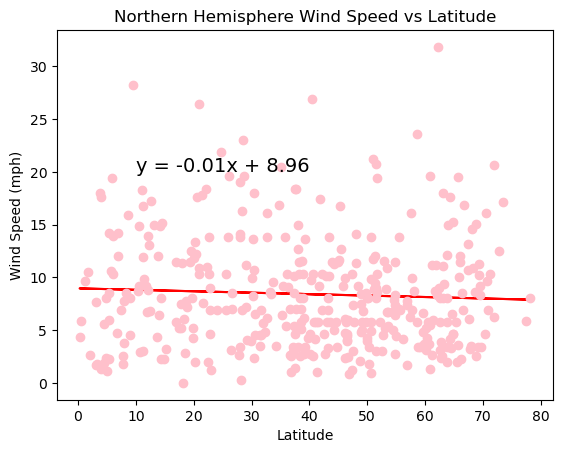

In [70]:
# Wind Speed Northern Hemisphere
x = north_hemisphere['Latitude']
y = north_hemisphere['Wind Speed']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(10, 20, equation_line, fontsize=14)

plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  -0.28946485713010356
Equation of the regression line: y = -0.12x + 5.74


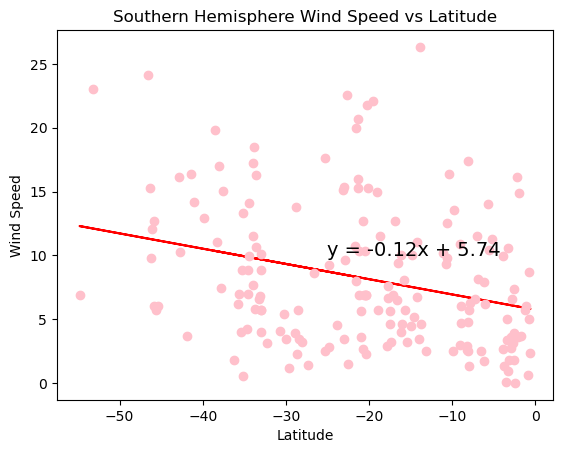

In [71]:
# Southern wind speed
x = south_hemisphere['Latitude']
y = south_hemisphere['Wind Speed']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-25, 10, equation_line, fontsize=14)

plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))